## Базовый EDA

#### Импорт библиотек

In [4]:
# Модуль os предоставляет множество функций для работы с операционной системой, 
# причём их поведение, как правило, не зависит от ОС, поэтому программы остаются
#  переносимыми.
import os

# pandas это высокоуровневая Python библиотека для анализа данных.
import pandas as pd

# Matplotlib — библиотека на языке программирования Python для визуализации данных 
# двумерной (2D) графикой (3D графика также поддерживается). Получаемые изображения 
# могут быть использованы в качестве иллюстраций в публикациях
import matplotlib.pyplot as plt

# Патч - это двухмерный рисунок, имеющий цвет грани и цвет края.
import matplotlib.patches as patches

# Модуль random предоставляет функции для генерации случайных чисел, букв, случайного
# выбора элементов последовательности.
import random

# eaborn - это библиотека визуализации данных на языке Python, основанная на matplotlib. 
# Она предоставляет высокоуровневый интерфейс для построения привлекательных 
# и информативных статистических графиков.
import seaborn as sns

# Модуль ast помогает Python приложениям обрабатывать Python деревья абстрактных 
# синтаксических грамматик. Сам абстрактный синтаксис может измениться с каждым 
# выпуском Python’а; этот модуль помогает программно узнать, как выглядит текущая грамматика.
import ast

# Метод os.path.join() в Python объединяет один или несколько компонентов пути интерактивно.
from os.path import join
%matplotlib inline


In [1]:
# Подключимся к диску для удобства.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Установим бибилиотеку BasicImageEDA

!pip install basic-image-eda


found 3422 images.
Using 2 threads. (max:2)



100%|██████████| 3422/3422 [07:20<00:00,  7.77it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  3422

dtype                                    |  uint8
channels                                 |  [3]
extensions                               |  ['jpg']

min height                               |  1024
max height                               |  1024
mean height                              |  1024.0
median height                            |  1024

min width                                |  1024
max width                                |  1024
mean width                               |  1024.0
median width                             |  1024

mean height/width ratio                  |  1.0
median height/width ratio                |  1.0
recommended input size(by mean)          |  [1024 1024] (h x w, multiples of 8)
recommended input size(by mean)          |  [1024 1024] (h x w, multiples of 16)
recommended input size(by mean)          |  [1024 1024

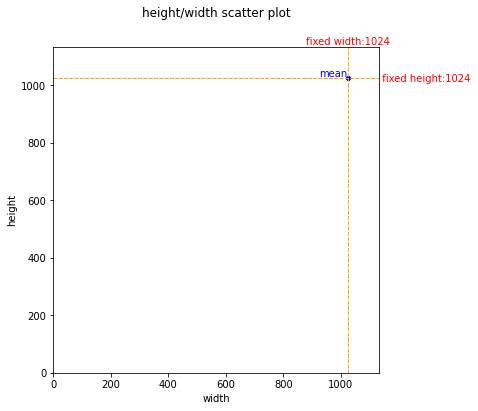

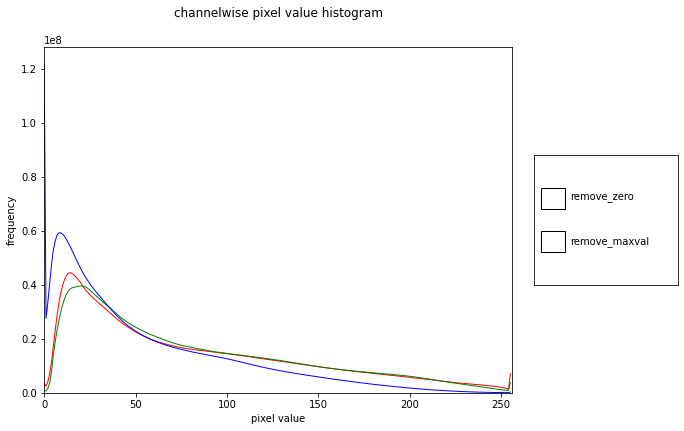

{'channels': [3],
 'dtype': 'uint8',
 'extensions': ['jpg'],
 'max_h': 1024,
 'max_w': 1024,
 'mean': array([0.31572315, 0.3177075 , 0.21511744], dtype=float32),
 'mean_h': 1024.0,
 'mean_hw_ratio': 1.0,
 'mean_w': 1024.0,
 'median_h': 1024,
 'median_hw_ratio': 1.0,
 'median_w': 1024,
 'min_h': 1024,
 'min_w': 1024,
 'rec_hw_size_16': array([1024, 1024]),
 'rec_hw_size_32': array([1024, 1024]),
 'rec_hw_size_8': array([1024, 1024]),
 'std': array([0.24460764, 0.23735899, 0.19324145], dtype=float32)}

In [24]:
# Воспользуемся базовой EDA

from basic_image_eda import BasicImageEDA

# Определим расширения исследуемых изображений
extensions = ['png', 'jpg', 'jpeg']

# Кол-во потокоа
threads = 0

# Вывод ряда графиков
dimension_plot = True

channel_hist = True

nonzero = False

hw_division_factor = 1.0

BasicImageEDA.explore('/content/drive/MyDrive/Diplomnay_rabota/GWHD/train',
                      extensions, threads, dimension_plot, channel_hist, nonzero, hw_division_factor) 

In [5]:
# Определяем расположение датасета
DIR ='/content/drive/MyDrive/Diplomnay_rabota/GWHD/'

# Произведём загрузку файла train.csv из комлпекта данных датасета, который содержит в себе информацию об аннотациях.
train_csv = pd.read_csv('/content/drive/MyDrive/Diplomnay_rabota/GWHD/train.csv')
train_csv.head()

,image_id,width,height,bbox,source
0,b6ab77fd7,1024,1024,"[834.0, 222.0, 56.0, 36.0]",usask_1
1,b6ab77fd7,1024,1024,"[226.0, 548.0, 130.0, 58.0]",usask_1
2,b6ab77fd7,1024,1024,"[377.0, 504.0, 74.0, 160.0]",usask_1
3,b6ab77fd7,1024,1024,"[834.0, 95.0, 109.0, 107.0]",usask_1
4,b6ab77fd7,1024,1024,"[26.0, 144.0, 124.0, 117.0]",usask_1


In [6]:
# Пустых данных нет
train_csv.isnull().any().any()

False

In [7]:
# Базовая информация об аннотациях
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147793 entries, 0 to 147792
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   image_id  147793 non-null  object
 1   width     147793 non-null  int64 
 2   height    147793 non-null  int64 
 3   bbox      147793 non-null  object
 4   source    147793 non-null  object
dtypes: int64(2), object(3)
memory usage: 5.6+ MB


In [8]:
# Определяем кол-во головок по ресурсу.
train_csv.source.value_counts()

ethz_1       51489
arvalis_1    45716
rres_1       20236
arvalis_3    16665
usask_1       5807
arvalis_2     4179
inrae_1       3701
Name: source, dtype: int64

In [9]:
# Длина и ширина инображений
print(train_csv.width.unique())
print(train_csv.height.unique())

[1024]
[1024]


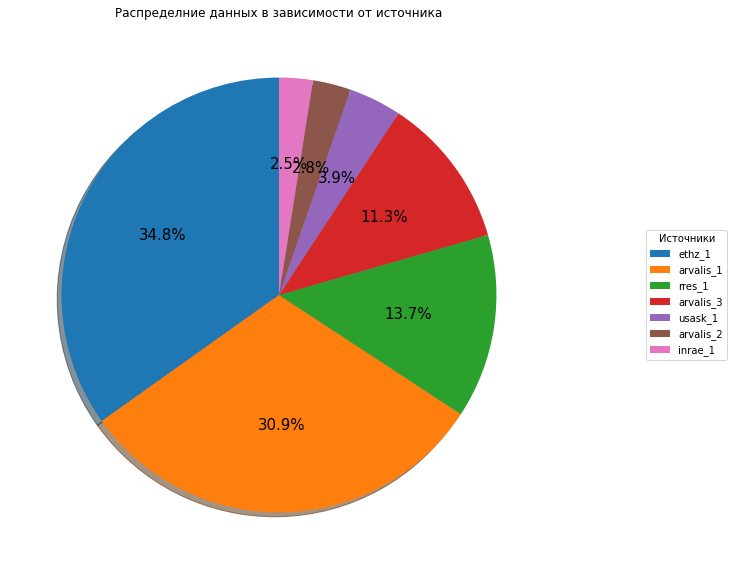

In [10]:
# Выведем кол-во спелых колосьев в зависимости от источника изображения

# Определяем их кол-во
counts = dict(train_csv['source'].value_counts())


# Готовим график определённого размера
fig, ax = plt.subplots(figsize=(10,10));

# Строим круговую диаграмму 
wedges, texts, autotexts = ax.pie(list(counts.values()), autopct='%1.1f%%',
        shadow = True, startangle = 90);
# Добавляем легенуда
ax.legend(wedges, list(counts.keys()),
          title="Источники",
          loc="center",
          bbox_to_anchor=(1, 0, 0.5, 1));

plt.setp(autotexts, size=15);

# Выделяем название
ax.set_title("Распределние данных в зависимости от источника");
plt.show();


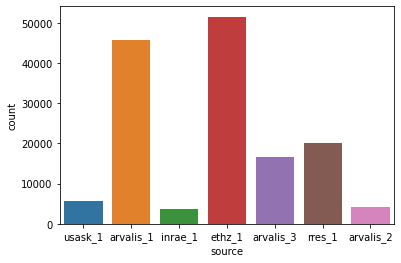

In [11]:
# Также строим столбчатую для большей наглядности

sns.countplot(x='source', data=train_csv);

In [12]:
print(f'Максимальное количество пшеничных головок на изображении: {max(train_csv["image_id"].value_counts())}')
print(f'Среднее количество пшеничных головока на изображении: {len(train_csv)/train_csv["image_id"].nunique()}')

Максимальное количество пшеничных головок на изображении: 116
Среднее количество пшеничных головока на изображении: 43.8164838422769


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


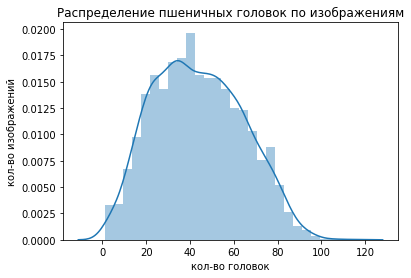

In [13]:
# Строим распределние кол-ва головок на изображении

sns.distplot(train_csv['image_id'].value_counts(), kde=True)
plt.xlabel('кол-во головок')
plt.ylabel('кол-во изображений')
plt.title('Распределение пшеничных головок по изображениям')
plt.show()

In [14]:
# Определим квсе изображения в виде списка.

all_images = os.listdir(os.path.join('/content/drive/MyDrive/Diplomnay_rabota/GWHD', 'train'))
all_images = set([x[:-4] for x in all_images])

images_with_bbox = set(list(train_csv['image_id']))

images_without_bbox = list(all_images - images_with_bbox)

print('Кол-во изображений без пшеничных головок: ' + str(len(images_without_bbox)))

Кол-во изображений без пшеничных головок: 49


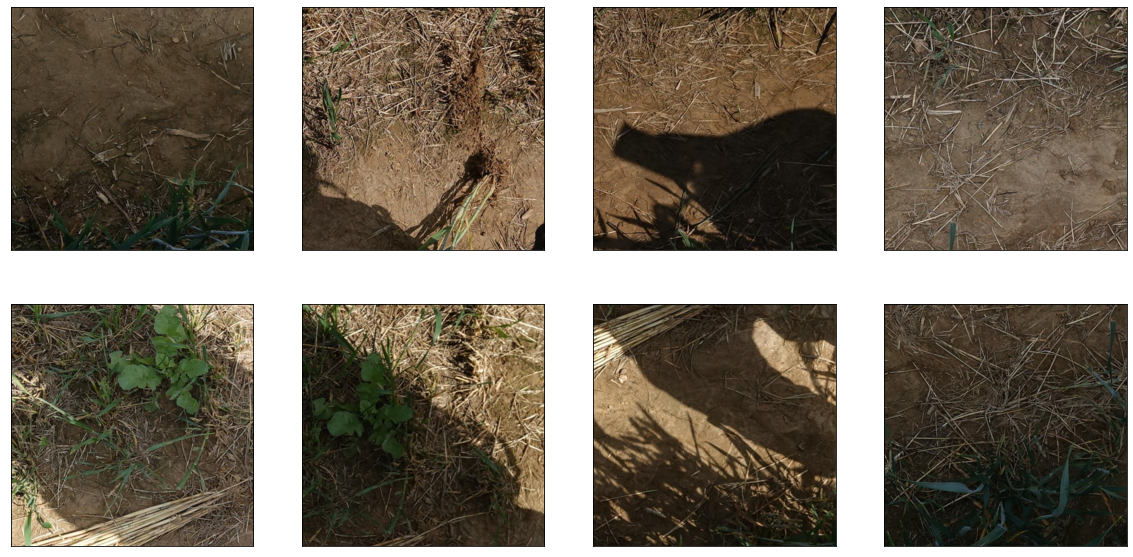

In [15]:
# Выведем данные пустые изображения

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
count = 20
for row in ax:
    for col in row:
        img_id = images_without_bbox[count]
        img = plt.imread(f'{os.path.join(DIR, "train", img_id)}.jpg')
        col.grid(False)
        col.set_xticks([])
        col.set_yticks([])
        col.imshow(img)
        count += 1
plt.show()

In [16]:
# Метод для получения bounding boxes

def get_bbox(image_id, df, col, color='white'):
    bboxes = df[df['image_id'] == image_id]
    
    for i in range(len(bboxes)):
        # Создаём квадрат на изображении согласно координатам
        rect = patches.Rectangle(
            (bboxes['x_min'].iloc[i], bboxes['y_min'].iloc[i]),
            bboxes['width'].iloc[i], 
            bboxes['height'].iloc[i], 
            linewidth = 3, 
            edgecolor = 'red', 
            facecolor = 'none')

        # Add the patch to the Axes
        col.add_patch(rect)

In [17]:
# Преобразуем исходный датасет для более удобного

train_csv[['x_min','y_min', 'width', 'height']] = pd.DataFrame([ast.literal_eval(x) for x in train_csv.bbox.tolist()], index= train_csv.index)
train_csv = train_csv[['image_id', 'bbox', 'source', 'x_min', 'y_min', 'width', 'height']]
train_csv

,image_id,bbox,source,x_min,y_min,width,height
0,b6ab77fd7,"[834.0, 222.0, 56.0, 36.0]",usask_1,834.0,222.0,56.0,36.0
1,b6ab77fd7,"[226.0, 548.0, 130.0, 58.0]",usask_1,226.0,548.0,130.0,58.0
2,b6ab77fd7,"[377.0, 504.0, 74.0, 160.0]",usask_1,377.0,504.0,74.0,160.0
3,b6ab77fd7,"[834.0, 95.0, 109.0, 107.0]",usask_1,834.0,95.0,109.0,107.0
4,b6ab77fd7,"[26.0, 144.0, 124.0, 117.0]",usask_1,26.0,144.0,124.0,117.0
...,...,...,...,...,...,...,...
147788,5e0747034,"[64.0, 619.0, 84.0, 95.0]",arvalis_2,64.0,619.0,84.0,95.0
147789,5e0747034,"[292.0, 549.0, 107.0, 82.0]",arvalis_2,292.0,549.0,107.0,82.0
147790,5e0747034,"[134.0, 228.0, 141.0, 71.0]",arvalis_2,134.0,228.0,141.0,71.0
147791,5e0747034,"[430.0, 13.0, 184.0, 79.0]",arvalis_2,430.0,13.0,184.0,79.0


In [21]:
# Определим изображение с максимальным кол-вом головок
image_id = (train_csv['image_id'].value_counts() == max(train_csv["image_id"].value_counts())).index[0]
print('Максимальное кол-во головок:',max(train_csv["image_id"].value_counts()))

Максимальное кол-во головок: 116


[]

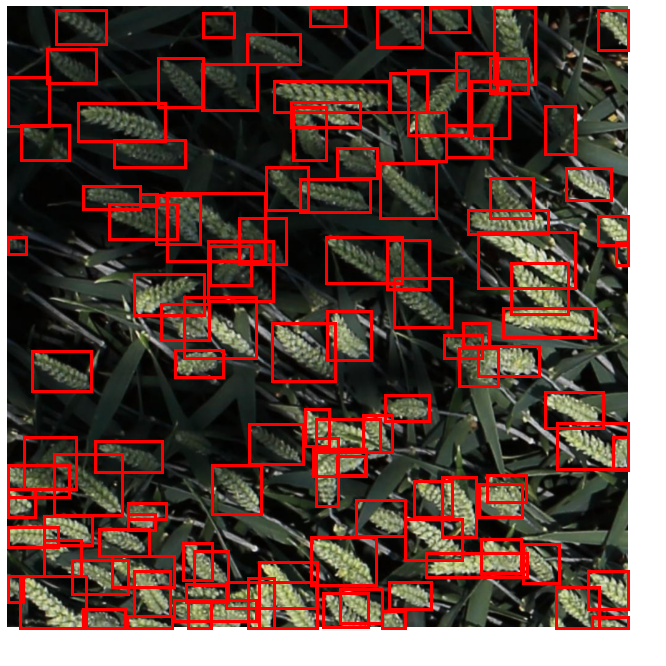

In [22]:
# Выведем изображение с максимальным кол-вом головок.
img = plt.imread(f'{os.path.join(DIR, "train", image_id)}.jpg')
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
get_bbox(image_id, train_csv, ax, color = 'red')
ax.imshow(img)
plt.plot()

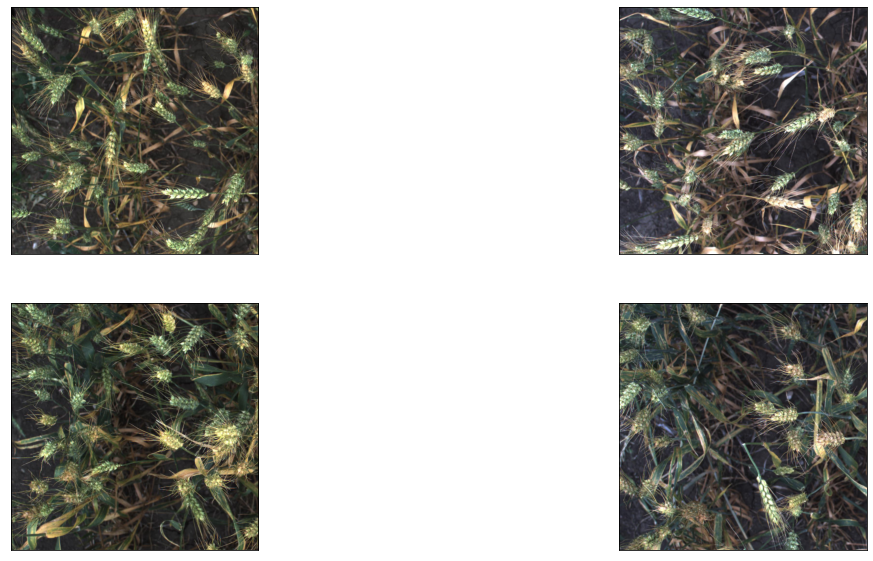

In [23]:
# Выведем несколько изображений из датасета 
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
count=0
for row in ax:
    for col in row:
        img = plt.imread(f'{os.path.join(DIR, "train", train_csv["image_id"].unique()[count])}.jpg')
        col.grid(False)
        col.set_xticks([])
        col.set_yticks([])
        col.imshow(img)
        count += 1
plt.show()

In [ ]:
# Выведем те же изображения, но с boudning boxes
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
count=0
for row in ax:
    for col in row:
        img_id = train_csv["image_id"].unique()[count]
        img = plt.imread(f'{os.path.join(DIR, "train", img_id)}.jpg')
        col.grid(False)
        col.set_xticks([])
        col.set_yticks([])
        get_bbox(img_id, train_csv, col, color='red')
        col.imshow(img)
        count += 1
plt.show()